In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud


In [4]:
# Load the data from dataset

data = pd.read_csv('../data/netflix_titles.csv')

In [5]:
data.head()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

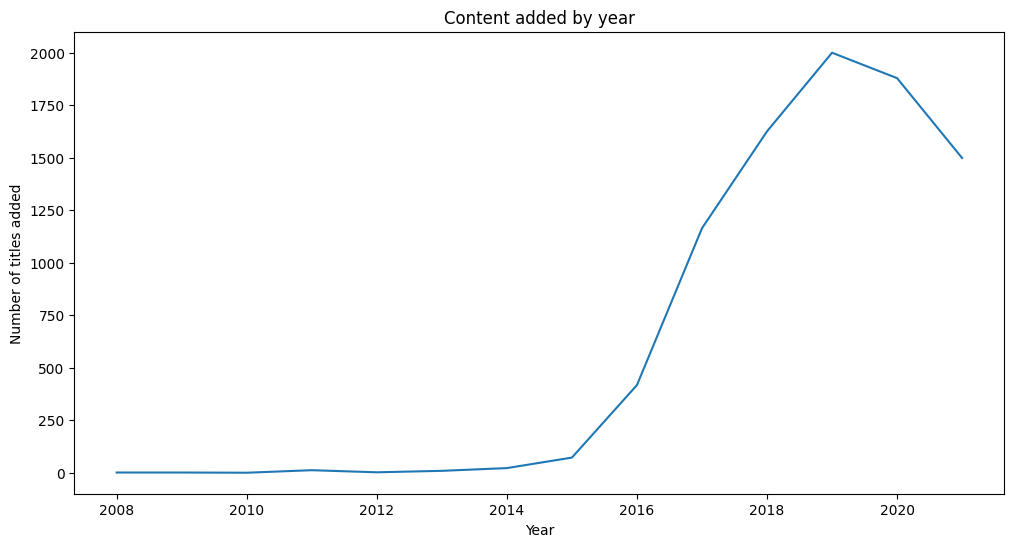

In [7]:
# Content over the years

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

data['year_added'] = data['date_added'].dt.year 
content_trend = data['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=content_trend.index, y=content_trend.values)
plt.title('Content added by year')
plt.xlabel('Year')
plt.ylabel('Number of titles added')
plt.show()


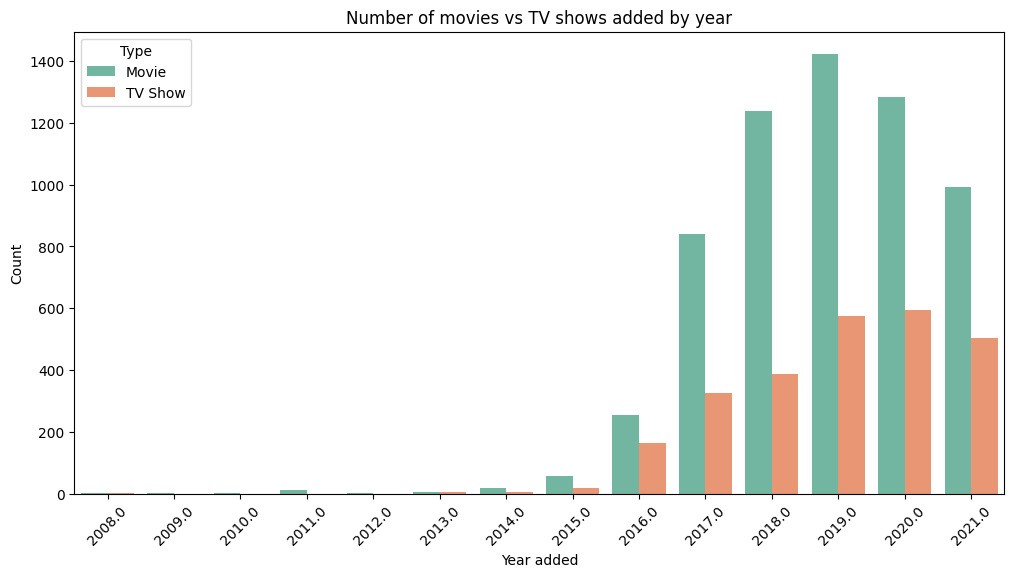

In [8]:
# Shows vs Movies
data['year_added'] = data['date_added'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='year_added', hue='type', palette='Set2')
plt.title('Number of movies vs TV shows added by year')
plt.xlabel('Year added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

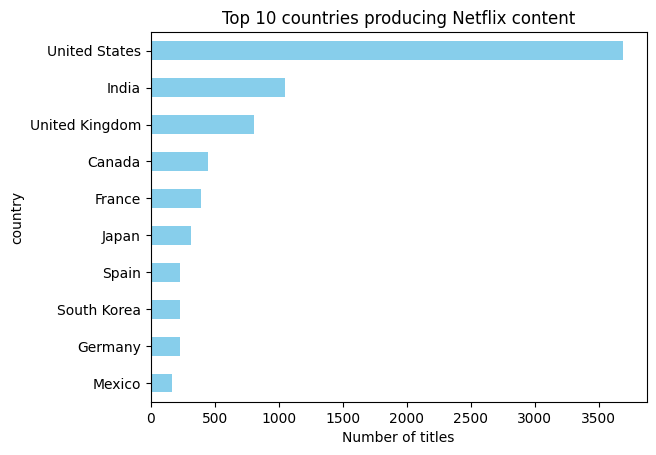

In [9]:
# Top 10 countries by content
top_countries = data['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 countries producing Netflix content')
plt.xlabel('Number of titles')
plt.gca().invert_yaxis()
plt.show()

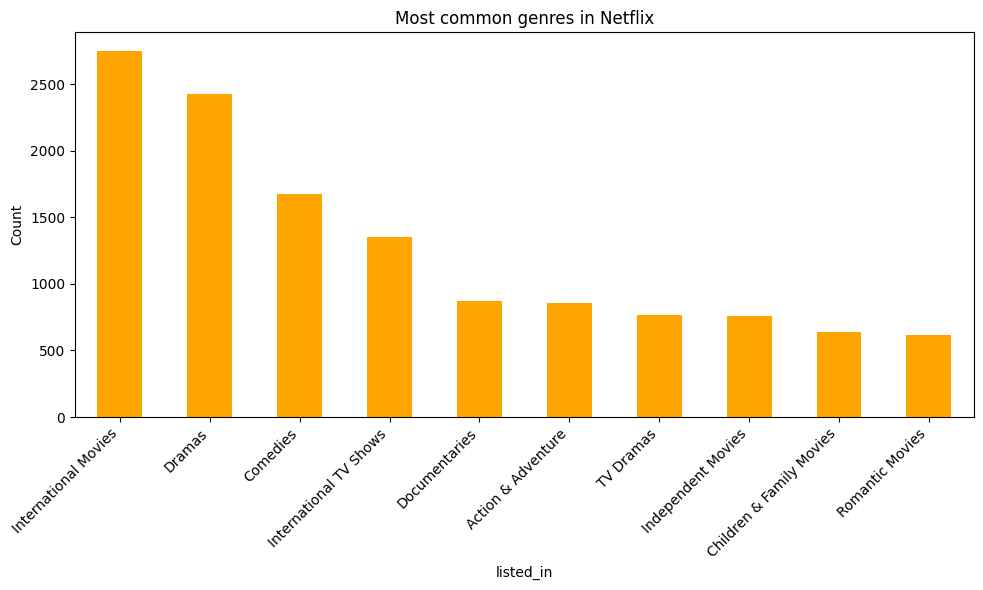

In [10]:
# Most common genres

plt.figure(figsize=(10,6))

data['listed_in'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', color='orange')

plt.title('Most common genres in Netflix')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


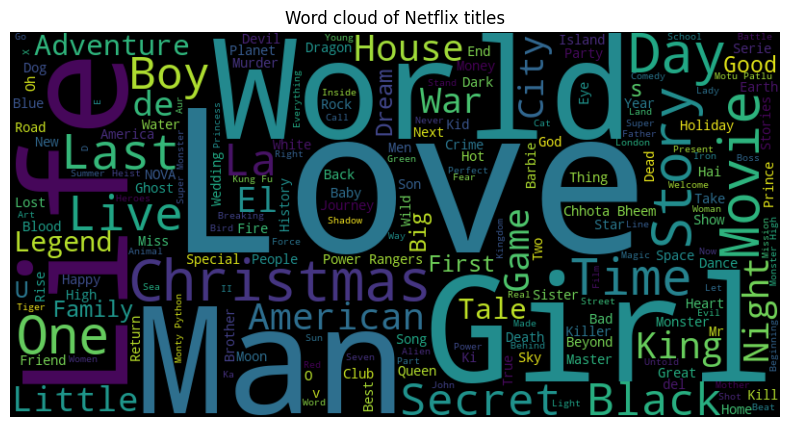

In [11]:
# Word cloud of titles

title_text = ' '.join(data['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(title_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of Netflix titles')
plt.show()